## <u>PCA Terms</u>
<p> Variance, CoVariance, Covariance Matrix(Matrix of Variance and Covariance, Eigen Vector and Eigen Values. </p>

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np

In [29]:
features, labels = load_iris(return_X_y=True)

In [30]:
features = StandardScaler().fit_transform(features)

In [31]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state=3, shuffle=True)

In [32]:
features_train.shape

(112, 4)

In [33]:
features_test.shape

(38, 4)

In [9]:
pca = PCA(n_components=2)

In [10]:
pca.fit(features_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
features_train = pca.transform(features_train)

In [13]:
svc = SVC()
svc.fit(features_train, labels_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
svc.score(pca.fit_transform(features_test), labels_test)

0.81578947368421051

In [18]:
cov_mat = np.cov(features.T)

In [19]:
print (cov_mat)

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [23]:
eig_val, eig_vec = np.linalg.eig(cov_mat) # For Eigen values and vector

In [24]:
eig_val

array([ 2.93035378,  0.92740362,  0.14834223,  0.02074601])

In [25]:
eig_vec

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [40]:
import matplotlib.pyplot as plt

In [44]:
pca.explained_variance_

array([ 3.4581241 ,  1.12676073])

Text(0,0.5,'cum sum')

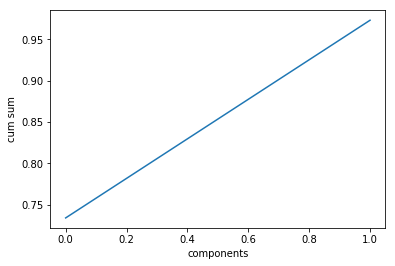

In [45]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("components")
plt.ylabel("cum sum")

In [46]:
from sklearn.datasets import make_classification

In [48]:
data = make_classification(n_samples=50000, n_features=1000)

In [55]:
features=data[0]
labels = data[1]
features = StandardScaler().fit_transform(features)

In [56]:
features.shape

(50000, 1000)

In [57]:
labels.shape

(50000,)

In [61]:
pca = PCA()
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

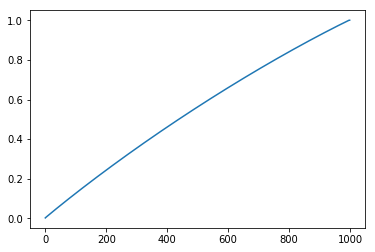

In [62]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [60]:
features

array([[ 0.7475021 ,  1.12552167, -0.7829565 , ...,  0.58466306,
         1.24725129, -2.2912146 ],
       [ 1.30160682, -1.39246426, -0.17480092, ..., -0.50001734,
         1.4101821 ,  0.13318473],
       [-0.45820873,  1.04277879, -0.92533313, ..., -1.22618542,
        -1.12194498,  0.6546513 ],
       ..., 
       [ 1.1303144 ,  3.05726008, -1.73698931, ..., -0.03823414,
        -0.10809418, -1.11331679],
       [ 0.83028147,  0.47171528, -0.25199659, ...,  0.4468105 ,
        -0.8876907 ,  1.45068622],
       [ 1.16169492, -1.34402106,  1.15938871, ..., -0.515937  ,
         1.53789362, -0.5343975 ]])

In [63]:
from sklearn.datasets import load_breast_cancer

In [64]:
data = load_breast_cancer()

In [65]:
len(data.data)

569

In [66]:
data.data.shape

(569, 30)

In [70]:
features = data.data
labels = data.target
features = StandardScaler().fit_transform(features)

In [71]:
pca = PCA()
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

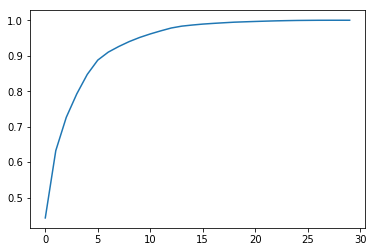

In [72]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [73]:
pca = PCA(n_components=25)

In [74]:
features = pca.fit_transform(features)

In [75]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state=3,shuffle=True)

In [76]:
from keras import Sequential
from keras.layers import Dense
from keras import losses

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [77]:
features_train.shape

(426, 25)

In [78]:
model = Sequential()
model.add(Dense(75, activation="relu", input_dim=25))
model.add(Dense(25, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer="adam", loss=losses.categorical_crossentropy, metrics=['acc'])

In [79]:
from keras.utils import to_categorical
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)

In [80]:
from keras.callbacks import TensorBoard
tensorboard = TensorBoard()

In [81]:
model.fit(features_train, labels_train, epochs=100, callbacks=[tensorboard])

Epoch 1/100
426/426 [==============================] - 0s 356us/step - loss: 0.5647 - acc: 0.7840
Epoch 2/100
426/426 [==============================] - 0s 90us/step - loss: 0.3626 - acc: 0.9554
Epoch 3/100
426/426 [==============================] - 0s 90us/step - loss: 0.2199 - acc: 0.9695
Epoch 4/100
426/426 [==============================] - 0s 93us/step - loss: 0.1402 - acc: 0.9765
Epoch 5/100
426/426 [==============================] - 0s 90us/step - loss: 0.0995 - acc: 0.9859
Epoch 6/100
426/426 [==============================] - 0s 96us/step - loss: 0.0795 - acc: 0.9859
Epoch 7/100
426/426 [==============================] - 0s 118us/step - loss: 0.0650 - acc: 0.9859
Epoch 8/100
426/426 [==============================] - 0s 101us/step - loss: 0.0552 - acc: 0.9859
Epoch 9/100
426/426 [==============================] - 0s 94us/step - loss: 0.0472 - acc: 0.9906
Epoch 10/100
426/426 [==============================] - 0s 80us/step - loss: 0.0420 - acc: 0.9930
Epoch 11/100
426/426 [====

426/426 [==============================] - 0s 90us/step - loss: 2.9791e-04 - acc: 1.0000
Epoch 84/100
426/426 [==============================] - 0s 72us/step - loss: 2.9336e-04 - acc: 1.0000
Epoch 85/100
426/426 [==============================] - 0s 76us/step - loss: 2.8121e-04 - acc: 1.0000
Epoch 86/100
426/426 [==============================] - 0s 74us/step - loss: 2.7078e-04 - acc: 1.0000
Epoch 87/100
426/426 [==============================] - 0s 87us/step - loss: 2.6354e-04 - acc: 1.0000
Epoch 88/100
426/426 [==============================] - 0s 101us/step - loss: 2.5342e-04 - acc: 1.0000
Epoch 89/100
426/426 [==============================] - 0s 122us/step - loss: 2.4780e-04 - acc: 1.0000
Epoch 90/100
426/426 [==============================] - 0s 136us/step - loss: 2.3982e-04 - acc: 1.0000
Epoch 91/100
426/426 [==============================] - 0s 117us/step - loss: 2.3507e-04 - acc: 1.0000
Epoch 92/100
426/426 [==============================] - 0s 100us/step - loss: 2.2754e-04 - 

In [82]:
pred = model.predict(features_test)

In [83]:
pred

array([[  9.19189702e-08,   9.99999881e-01],
       [  1.87553186e-02,   9.81244683e-01],
       [  4.84387328e-06,   9.99995112e-01],
       [  3.22864828e-08,   1.00000000e+00],
       [  1.00000000e+00,   2.85424910e-08],
       [  2.48620449e-06,   9.99997497e-01],
       [  4.40034910e-06,   9.99995589e-01],
       [  4.72813289e-10,   1.00000000e+00],
       [  3.62068153e-09,   1.00000000e+00],
       [  1.86281980e-07,   9.99999762e-01],
       [  2.93968683e-10,   1.00000000e+00],
       [  9.99997139e-01,   2.89559694e-06],
       [  2.38502240e-09,   1.00000000e+00],
       [  2.79682098e-07,   9.99999762e-01],
       [  1.53402313e-09,   1.00000000e+00],
       [  4.58114755e-07,   9.99999523e-01],
       [  1.78446882e-07,   9.99999881e-01],
       [  4.54472282e-09,   1.00000000e+00],
       [  1.00000000e+00,   1.77402928e-08],
       [  9.81954575e-01,   1.80454291e-02],
       [  1.05612855e-06,   9.99998927e-01],
       [  1.02038928e-06,   9.99998927e-01],
       [  

In [84]:
pred = np.argmax(pred, axis=1)

In [85]:
labels_test = np.argmax(labels_test, axis=1)

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, pred)

0.97202797202797198

In [87]:
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0])

In [88]:
len(pred)

143

In [90]:
labels_test[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [92]:
pred[0:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1])